In [1]:
pwd

'C:\\Users\\Bharat\\data science\\Internship\\PRCP-1025-FlightPricePrediction\\flight-fare'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Dataset

In [7]:
data=pd.read_excel("Flight_Fare.xlsx")
pd.set_option("display.max_rows",None)
data

Airline Date_of_Journey    Source  \
0                                 IndiGo      24/03/2019  Banglore   
1                              Air India       1/05/2019   Kolkata   
2                            Jet Airways       9/06/2019     Delhi   
3                                 IndiGo      12/05/2019   Kolkata   
4                                 IndiGo      01/03/2019  Banglore   
5                               SpiceJet      24/06/2019   Kolkata   
6                            Jet Airways      12/03/2019  Banglore   
7                            Jet Airways      01/03/2019  Banglore   
8                            Jet Airways      12/03/2019  Banglore   
9                      Multiple carriers      27/05/2019     Delhi   
10                             Air India       1/06/2019     Delhi   
11                                IndiGo      18/04/2019   Kolkata   
12                             Air India      24/06/2019   Chennai   
13                           Jet Airways       9/05/2019   Kolkata   
14                                IndiGo      24/04/2019   Kolkata   
15                             Air India       3/03/2019     Delhi   
16                              SpiceJet      15/04/2019     Delhi   
17                           Jet Airways      12/06/2019     Delhi   
18                             Air India      12/06/2019     Delhi   
19                           Jet Airways      27/05/2019     Delhi   
20                                 GoAir       6/03/2019     Delhi   
21                             Air India      21/03/2019  Banglore   
22                                IndiGo       3/04/2019  Banglore   
23                                IndiGo       1/05/2019  Banglore   
24                           Jet Airways       6/05/2019   Kolkata   
25                           Jet Airways       9/06/2019     Delhi   
26                                IndiGo       1/06/2019     Delhi   
27                                 GoAir      15/05/2019     Delhi   
28                               Vistara      18/06/2019  Banglore   
29                               Vistara      15/06/2019   Chennai   
30                               Vistara      18/06/2019   Chennai   
31                             Air India       1/05/2019   Kolkata   
32                                IndiGo       6/04/2019  Banglore   
33                           Jet Airways      15/06/2019     Delhi   
34                           Jet Airways      18/05/2019     Delhi   
35                                IndiGo      27/06/2019     Delhi   
36                              SpiceJet      21/05/2019   Kolkata   
37                             Air India      18/05/2019   Kolkata   
38                           Jet Airways      06/03/2019  Banglore   
39                           Jet Airways       3/06/2019     Delhi   
40                     Multiple carriers      21/05/2019     Delhi   
41                             Air India      15/03/2019  Banglore   
42                           Jet Airways      18/05/2019     Delhi   
43                              Air Asia       6/05/2019  Banglore   
44                     Multiple carriers      21/03/2019     Delhi   
45                              SpiceJet      24/03/2019  Banglore   
46                                IndiGo      27/05/2019  Banglore   
47                             Air India       3/05/2019   Chennai   
48                             Air India      15/05/2019   Kolkata   
49                           Jet Airways      27/06/2019     Delhi   
50                           Jet Airways       9/03/2019     Delhi   
51                           Jet Airways       1/05/2019   Kolkata   
52                                IndiGo      24/03/2019  Banglore   
53                                IndiGo      18/06/2019  Banglore   
54                              Air Asia       3/04/2019  Banglore   
55                           Jet Airways      24/03/2019   Kolkata   
56                             Air India   

# Basic Checks

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
data.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering or Curating some features

- extracting day and month from the "Date_of_Journey" feature and dividing it into two features.
- As all data is from the year 2019, year will not have any effect on final price.

In [15]:
#select the feature//convert it into string//split into list//indexing//change data type
#Date is in DD/MM/YYYY form
data["Day_of_Journey"] = data['Date_of_Journey'].str.split('/').str[0].astype(int)
data["Month_of_Journey"] = data['Date_of_Journey'].str.split('/').str[1].astype(int)
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [16]:
data.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Day_of_Journey  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897              24   
1         13:15   7h 25m     2 stops         No info   7662               1   
2  04:25 10 Jun      19h     2 stops         No info  13882               9   
3         23:30   5h 25m      1 stop         No info   6218              12   
4         21:35   4h 45m      1 stop         No info  13302               1   

   Month_of_Journey  
0                 3  
1                 5  
2                 6  
3                 5  
4                 3

- we can also bifurcate departure time and arrival time into hours and mins
- using to_datetime function in pandas

In [18]:
data["Dep_Hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_Min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [21]:
data["Arr_Hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arr_Min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [23]:
data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Day_of_Journey  Month_of_Journey  \
0    non-stop         No info   3897              24                 3   
1     2 stops         No info   7662               1                 5   
2     2 stops         No info  13882               9                 6   
3      1 stop         No info   6218              12                 5   
4      1 stop         No info  13302               1                 3   

   Dep_Hour  Dep_Min  Arr_Hour  Arr_Min  
0        22       20         1       10  
1         5       50        13       15  
2         9       25         4       25  
3        18        5        23       30  
4        16       50        21       35

- we can also bring flight duration under one scale by converting it in minutes

In [31]:
data["Duration"] = data["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","1").apply(eval)

In [32]:
data.head()

Airline    Source Destination                  Route  Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL       761   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR      1011   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      1960   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR       811   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL       911   

  Total_Stops Additional_Info  Price  Day_of_Journey  Month_of_Journey  \
0    non-stop         No info   3897              24                 3   
1     2 stops         No info   7662               1                 5   
2     2 stops         No info  13882               9                 6   
3      1 stop         No info   6218              12                 5   
4      1 stop         No info  13302               1                 3   

   Dep_Hour  Dep_Min  Arr_Hour  Arr_Min  
0        22       20         1       10  
1         5       50        13       15  
2         9       25         4       25  
3        18        5        23       30  
4        16       50        21       35

- Total_Stops can also be converted to numerical data

In [43]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [44]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [45]:
data.head()

Airline    Source Destination                  Route  Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL       761   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR      1011   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      1960   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR       811   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL       911   

   Total_Stops Additional_Info  Price  Day_of_Journey  Month_of_Journey  \
0            0         No info   3897              24                 3   
1            2         No info   7662               1                 5   
2            2         No info  13882               9                 6   
3            1         No info   6218              12                 5   
4            1         No info  13302               1                 3   

   Dep_Hour  Dep_Min  Arr_Hour  Arr_Min  
0        22       20         1       10  
1         5       50        13       15  
2         9       25         4       25  
3        18        5        23       30  
4        16       50        21       35

# Exploratory data analysis

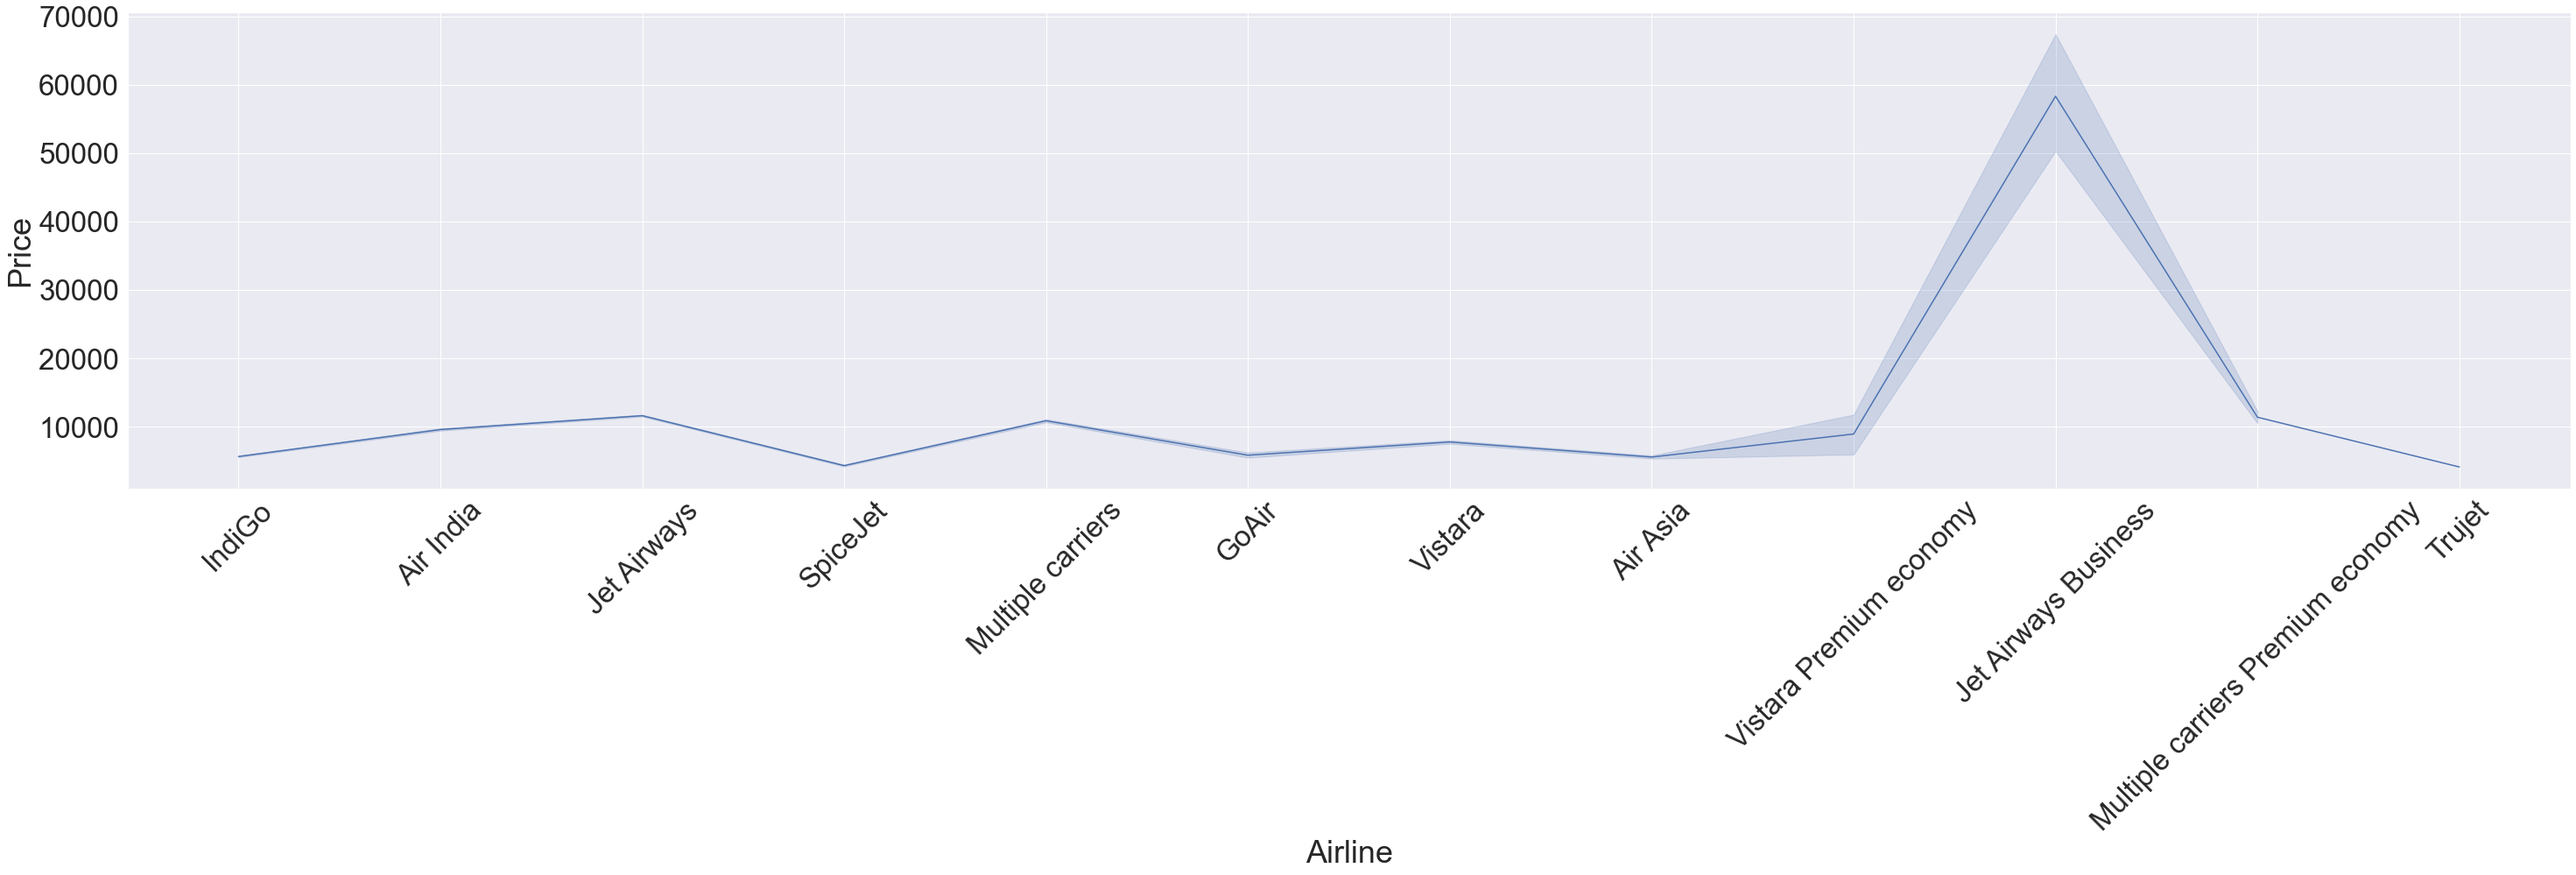

In [109]:
plt.figure(figsize=(50,10))
sns.lineplot(x=data["Airline"],y=data["Price"])
sns.set(font_scale=3)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='Destination', ylabel='Price'>

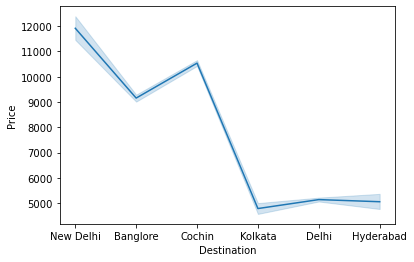

In [73]:
sns.lineplot(x=data["Destination"],y=data["Price"])

<AxesSubplot:xlabel='Source', ylabel='Price'>

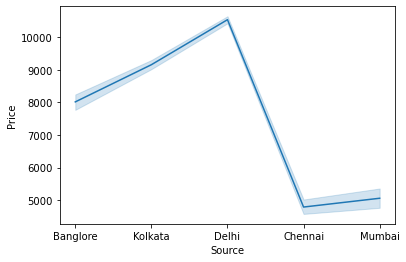

In [74]:
sns.lineplot(x=data["Source"],y=data["Price"])

<AxesSubplot:xlabel='Month_of_Journey', ylabel='Price'>

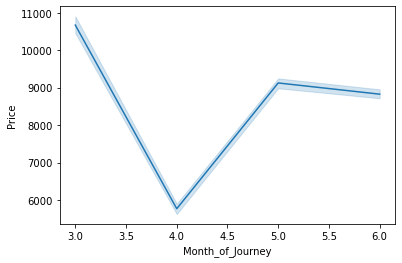

In [36]:
sns.lineplot(x=data["Month_of_Journey"],y=data["Price"])

<AxesSubplot:xlabel='Day_of_Journey', ylabel='Price'>

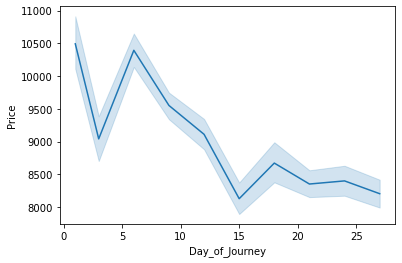

In [37]:
sns.lineplot(x=data["Day_of_Journey"],y=data["Price"])

<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

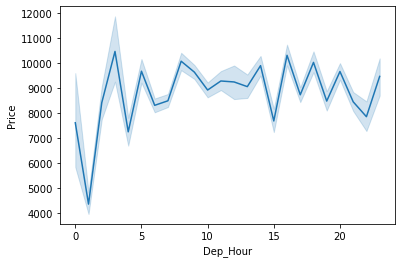

In [38]:
sns.lineplot(x=data["Dep_Hour"],y=data["Price"])

<AxesSubplot:xlabel='Arr_Hour', ylabel='Price'>

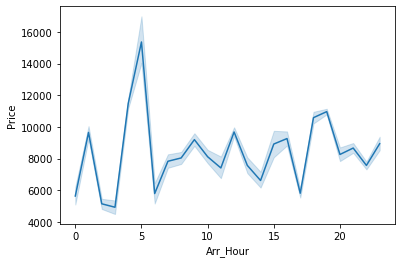

In [41]:
sns.lineplot(x=data["Arr_Hour"],y=data["Price"])

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

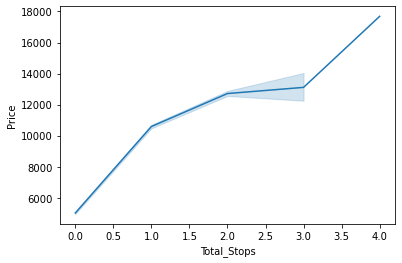

In [46]:
sns.lineplot(x=data["Total_Stops"],y=data["Price"])

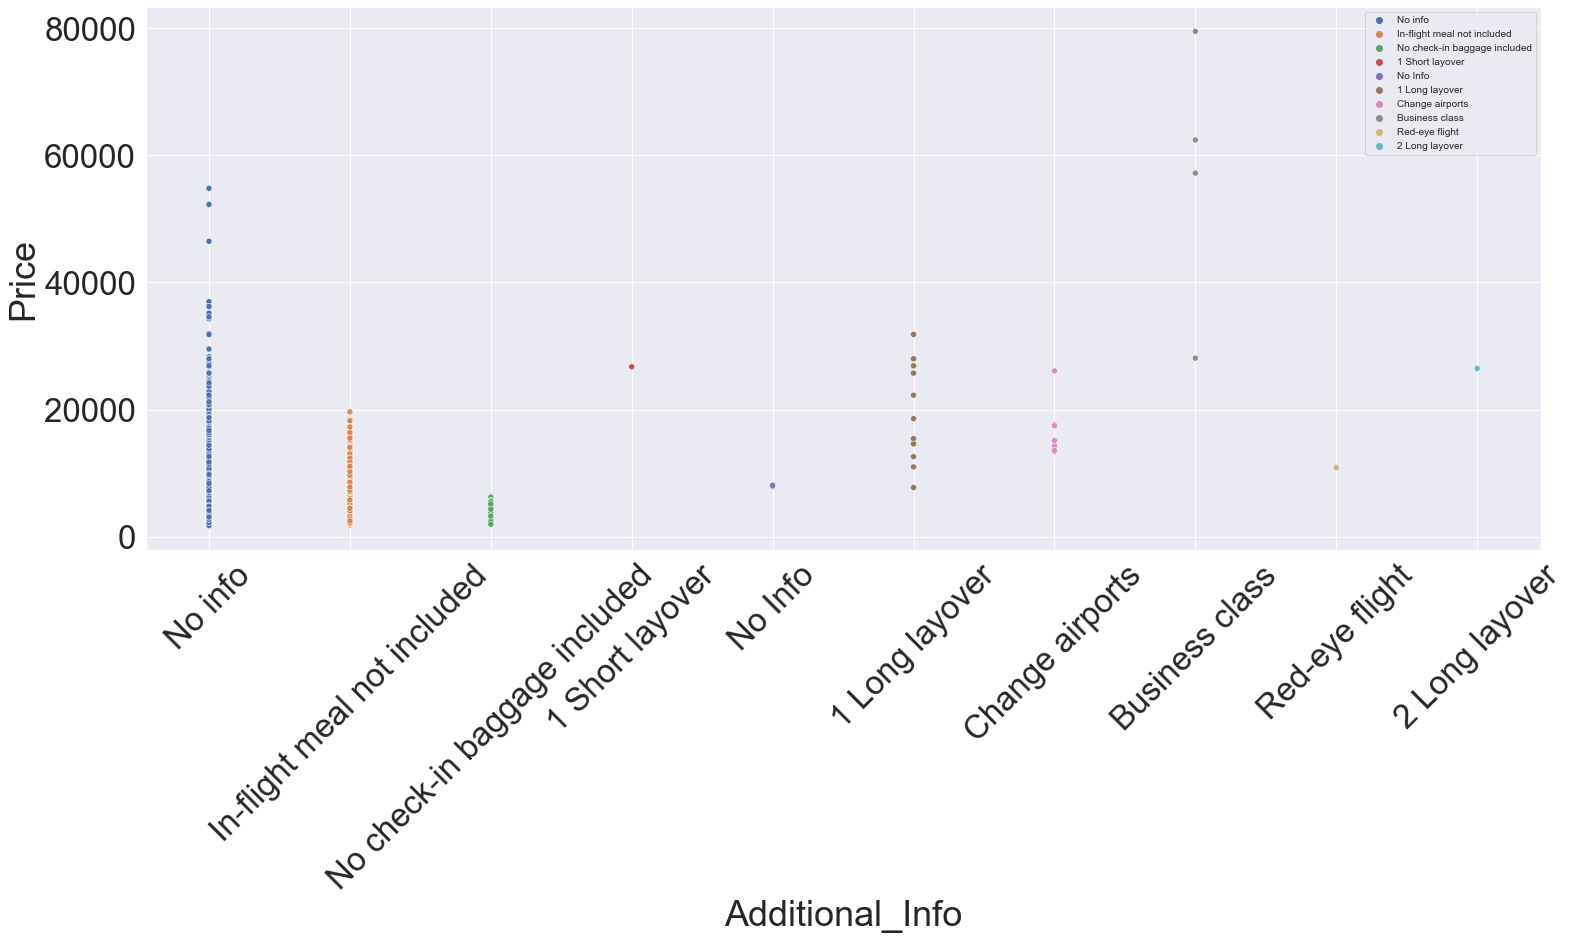

In [108]:
plt.figure(figsize=(25,10))
sns.scatterplot(x=data["Additional_Info"],y=data["Price"],hue=data["Additional_Info"])
sns.set(font_scale=3)
plt.xticks(rotation=45)
plt.legend(fontsize=10)